In [1]:
import os
import pandas as pd

# Get current working directory
current_dir = os.getcwd()

# Navigate to data folder
data_dir = os.path.join(current_dir, "data")

# Read CSV file
df = pd.read_csv(os.path.join(data_dir, "faers_asthma.csv"), sep=",")


In [2]:
print(df.head(20))

    Case ID Suspect Product Names  \
0   4974950           A-Methapred   
1   4974946           A-Methapred   
2   4652544           A-Methapred   
3   4656790           A-Methapred   
4   4610124           A-Methapred   
5   4596749           A-Methapred   
6   3803328                Aarane   
7   3122556                Aarane   
8   5267443                Aarane   
9   4999576                Aarane   
10  4881479                Aarane   
11  4794604                Aarane   
12  5619065                Aarane   
13  4314547                Aarane   
14  4306271                Aarane   
15  4299072                Aarane   
16  4298845                Aarane   
17  4298843                Aarane   
18  4299447                Aarane   
19  4291632                Aarane   

                   Suspect Product Active Ingredients  \
0                 Methylprednisolone Sodium Succinate   
1                 Methylprednisolone Sodium Succinate   
2                 Methylprednisolone Sodium Succina

In [3]:
selected_cols = df[['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients', 'Reactions', 'Serious','Outcomes', 'Sex',
                   'Patient Age', 'Patient Weight','Reporter Type','Report Source', 'Concomitant Product Names','Country where Event occurred', 'Reported to Manufacturer?',]]
print(selected_cols)


      Suspect Product Names Reason for Use  \
0               A-Methapred              -   
1               A-Methapred              -   
2               A-Methapred              -   
3               A-Methapred              -   
4               A-Methapred              -   
...                     ...            ...   
92319                     -              -   
92320                     -              -   
92321                     -              -   
92322                     -              -   
92323                     -              -   

        Suspect Product Active Ingredients  \
0      Methylprednisolone Sodium Succinate   
1      Methylprednisolone Sodium Succinate   
2      Methylprednisolone Sodium Succinate   
3      Methylprednisolone Sodium Succinate   
4      Methylprednisolone Sodium Succinate   
...                                    ...   
92319                       Nitrofurantoin   
92320                           Gentamicin   
92321                            

In [4]:
# Select rows that have a specified Reason for Use
df = df[df['Reason for Use'].notna()]


# Select rows wherer Country where event occurred is included
df = df[~df['Country where Event occurred'].str.lower().isin(['not specified', 'unknown', 'other'])]

# Select rows where age is provided

df = df[df['Patient Age'] != 'Not Specified']

# Select rows where the Serious column says 'Serious' and the Reporter Type column says 'Healthcare Professional'
df = df[(df['Serious'] == 'Serious') & (df['Reporter Type'] == 'Healthcare Professional')]

# Select the desired columns
selected_cols = df[['Suspect Product Names', 'Reason for Use', 'Suspect Product Active Ingredients', 'Reactions', 'Serious', 'Outcomes', 'Sex', 'Patient Age', 'Patient Weight', 'Reporter Type', 'Report Source', 'Concomitant Product Names', 'Country where Event occurred', 'Reported to Manufacturer?']]

# Print the selected columns
print(selected_cols)


      Suspect Product Names  \
71                  Abilify   
73                  Abilify   
103                 Abilify   
106                 Abilify   
109        Abilify Maintena   
...                     ...   
89345                     -   
89346                     -   
89351                     -   
89356                     -   
89367                     -   

                                          Reason for Use  \
71     Alcohol Abuse;Anxiety;Attention Deficit Hypera...   
73     Product Used For Unknown Indication;Schizophrenia   
103                                                    -   
106                              Mania;Thinking Abnormal   
109                  Product Used For Unknown Indication   
...                                                  ...   
89345                                             Asthma   
89346                              Asthma;Duodenal Ulcer   
89351                                  Ulcer Haemorrhage   
89356                      

In [5]:
df["Reactions"]


71       Erythema;Compulsive Sexual Behaviour;Economic ...
73                                                  Asthma
103                                        Asthma;Pruritus
106      Influenza;White Blood Cell Count Increased;Ren...
109      Asthma;Hallucination, Visual;Anxiety;Inappropr...
                               ...                        
89345        Asthma;Sputum Purulent;Pneumonia Pneumococcal
89346    Blood Potassium Increased;Myasthenic Syndrome;...
89351    Cholelithiasis;Amylase Increased;Blood Potassi...
89356    Oedema;Erythema;Paraesthesia;Hypersensitivity;...
89367    Asthma;Pyrexia;Fatigue;Arthralgia;Myalgia;Asth...
Name: Reactions, Length: 18578, dtype: object

In [6]:
!pip install nltk

In [7]:
import re
import string
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

def preprocess_text(text):
    # convert to lowercase
    text = df["Reactions"].lower()
    
    # remove punctuation
    text = df["Reactions"].translate(str.maketrans("", "", string.punctuation))
    
    # remove digits
    text = re.sub(r"\d+", "", text)
    
    # remove stopwords
    stop_words = set(stopwords.words("english"))
    text_tokens = nltk.word_tokenize(text)
    filtered_words = [word for word in text_tokens if word not in stop_words]
    
    # join the cleaned words in a list
    text = " ".join(filtered_words)
    
    return text


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chera\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans


def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

# preprocess text
processed_text = df["Reactions"].apply(preprocess_text)

# vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_text)

# cluster text
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# print cluster centers
print(vectorizer.inverse_transform(kmeans.cluster_centers_))


D:\mcon3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[array(['0anogenital', '0hepatic', '0interstitial', ...,
       'zostervomitingasthma', 'zosterweight', 'zosterwheezingskin'],
      dtype='<U120'), array(['abdominal', 'ablationgranulomabreath',
       'ablationhypersensitivityasthmaoxygen', ..., 'zosterupper',
       'zosterurticariahypoventilationarthropathynauseaface',
       'zosterviral'], dtype='<U120'), array(['abdominal', 'abilitycoughdyspnoeadysphonialoss', 'abnormal', ...,
       'zosterskin', 'zostertherapeutic', 'zosterwheezingloss'],
      dtype='<U120'), array(['asthma'], dtype='<U120'), array(['abdominal', 'abilityaspiration', 'abnormal', ..., 'xray',
       'zosterfull', 'zosterloss'], dtype='<U120')]


In [9]:
!pip install wordcloud

D:\mcon3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


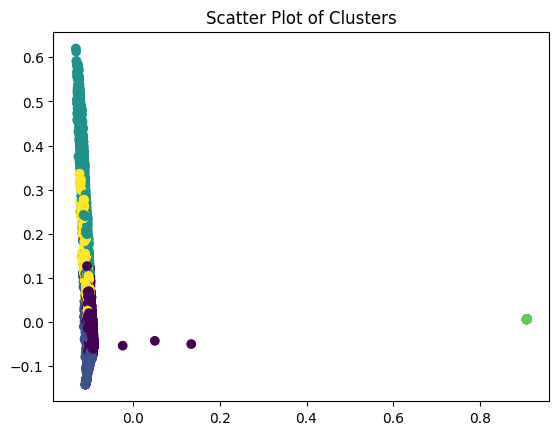

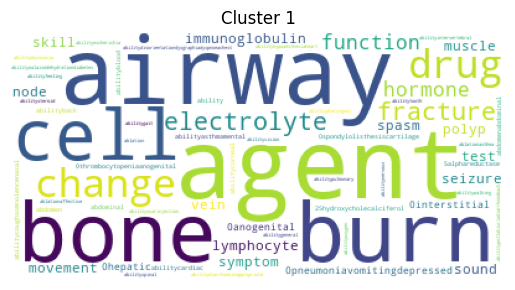

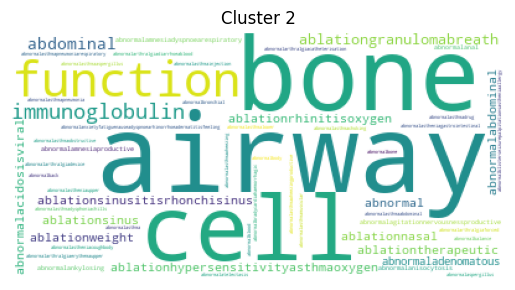

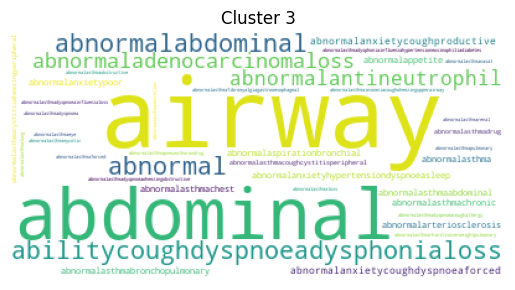

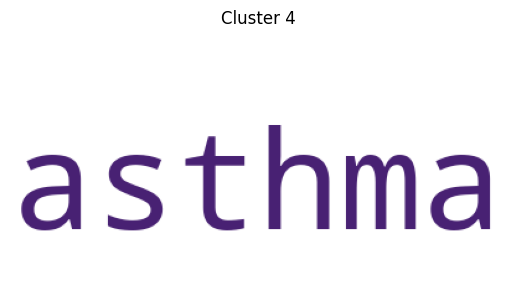

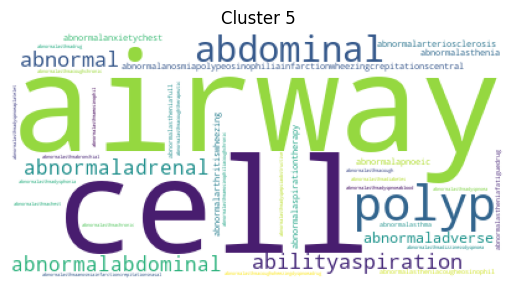

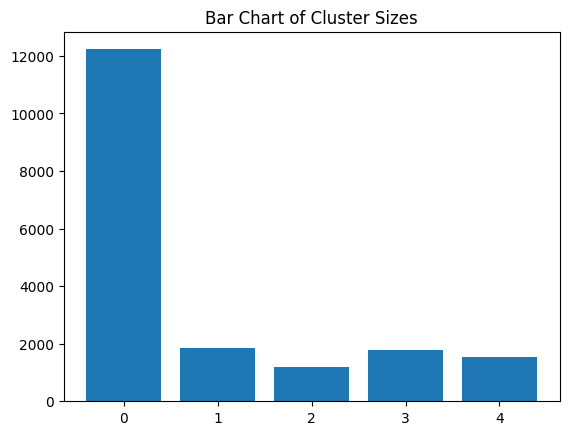

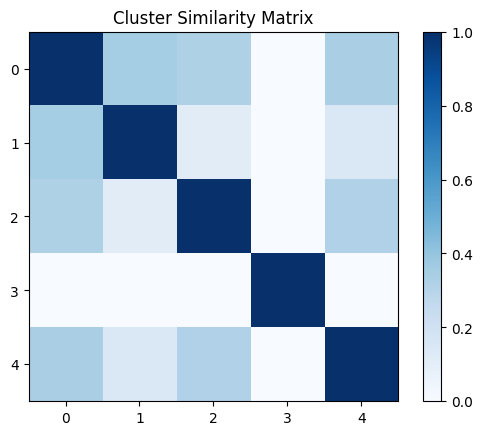

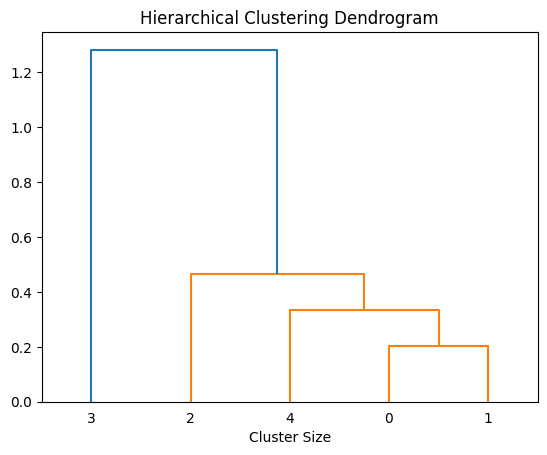

In [12]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram


def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text



# preprocess text
processed_text = df["Reactions"].apply(preprocess_text)

# vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_text)

# cluster text
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# scatter plot of the clusters
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=kmeans.labels_)
plt.title('Scatter Plot of Clusters')
plt.show()


    

# word cloud for each cluster
for i in range(kmeans.n_clusters):
    cluster_words = vectorizer.inverse_transform(kmeans.cluster_centers_[i].reshape(1, -1))
    wordcloud = WordCloud(background_color='white').generate_from_text(' '.join(cluster_words[0]))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(f"Cluster {i+1}")
    plt.show()


# bar chart of cluster sizes
cluster_sizes = np.bincount(kmeans.labels_)
plt.bar(range(kmeans.n_clusters), cluster_sizes)
plt.title('Bar Chart of Cluster Sizes')
plt.show()

# similarity matrix
cluster_distances = pdist(kmeans.cluster_centers_, metric='cosine')
similarity_matrix = 1 - squareform(cluster_distances)
plt.imshow(similarity_matrix, cmap='Blues')
plt.colorbar()
plt.title('Cluster Similarity Matrix')
plt.show()

# dendrogram of the clusters
linkage_matrix = linkage(kmeans.cluster_centers_, method='ward', metric='euclidean')
dendrogram(linkage_matrix, truncate_mode='lastp', p=kmeans.n_clusters, leaf_font_size=10, orientation='top')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.show()


In [13]:
import pandas as pd
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

def preprocess_text(text):
    # convert to lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

# preprocess text
processed_text = df["Reactions"].apply(preprocess_text)

# vectorize text
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_text)

# cluster text
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

# get cluster labels
labels = kmeans.labels_

# create dictionary to store words for each cluster
cluster_word_lists = {}
for i in range(len(labels)):
    if labels[i] not in cluster_word_lists:
        cluster_word_lists[labels[i]] = []
    words = vectorizer.inverse_transform(X[i])[0]
    cluster_word_lists[labels[i]].extend(words)

# write cluster word lists to CSV
with open("cluster_word_lists.csv", "w") as f:
    for cluster_label in cluster_word_lists:
        word_list = ",".join(cluster_word_lists[cluster_label])
        f.write(f"Cluster {cluster_label}: {word_list}\n")


D:\mcon3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
